# A Tour of Machine Learning Classifiers Using Scikit-Learn
Chapter 3 of 

In [15]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [13]:
iris = datasets.load_iris()
print(iris.data.shape)

X = iris.data[:, [2,3]]
y = iris.target

labels = np.unique(y)
print(labels) 

labels_enum = {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"}

(150, 4)
[0 1 2]


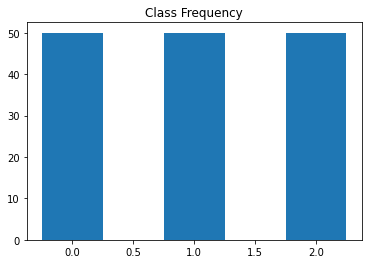

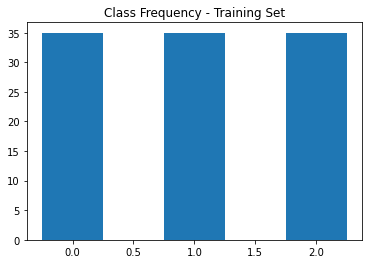

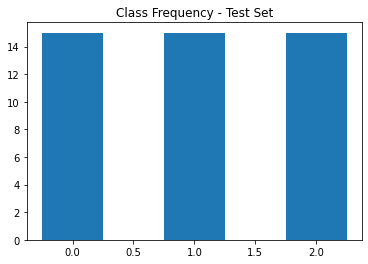

In [21]:
# Load dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

unique_values, counts = np.unique(y, return_counts=True)
plt.bar(unique_values, counts, width=0.5, align='center')
plt.title("Class Frequency")
plt.show()

unique_values, counts = np.unique(y_train, return_counts=True)
plt.bar(unique_values, counts, width=0.5, align='center')
plt.title("Class Frequency - Training Set")
plt.show()

unique_values, counts = np.unique(y_test, return_counts=True)
plt.bar(unique_values, counts, width=0.5, align='center')
plt.title("Class Frequency - Test Set")
plt.show()


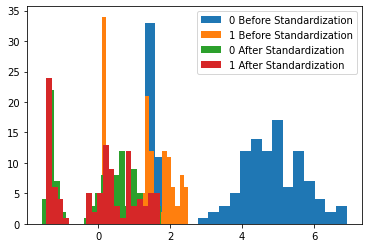

In [29]:
from sklearn.preprocessing import StandardScaler

plt.hist(X[:, 0], bins=20, label="0 Before Standardization")
plt.hist(X[:, 1], bins=20, label="1 Before Standardization")


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

plt.hist(X_train_std[:, 0], bins=20, label="0 After Standardization")
plt.hist(X_train_std[:, 1], bins=20, label="1 After Standardization")
plt.legend()
plt.show()


In [32]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [46]:
y_pred = ppn.predict(X_test_std)
print("Misclassified samples: %d" % (y_test != y_pred).sum())

print("Accuracy: %.3f" % (1 - (1.0 / len(y_pred))))
print("Accuracy: %.3f" % accuracy_score(y_test, y_pred))
print("Accuracy: %.3f" % ppn.score(X_test_std, y_test))

Misclassified samples: 1
Accuracy: 0.978
Accuracy: 0.978
Accuracy: 0.978


In [37]:
from matplotlib.colors import ListedColormap 
import matplotlib.pyplot as plt 
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')

    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)) 
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) 
    lab = lab.reshape(xx1.shape) 
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max()) 
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples 
    for idx, cl in enumerate(np.unique(y)):

        plt.scatter(x=X[y == cl, 0],
            y=X[y == cl, 1], alpha=0.8, 
            c=colors[idx], 
            marker=markers[idx], 
            label=f'Class {cl}', 
            edgecolor='black') # highlight test examples 
    
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
        c='none', edgecolor='black', alpha=1.0,
        linewidth=1, marker='o',
        s=100, label='Test set')

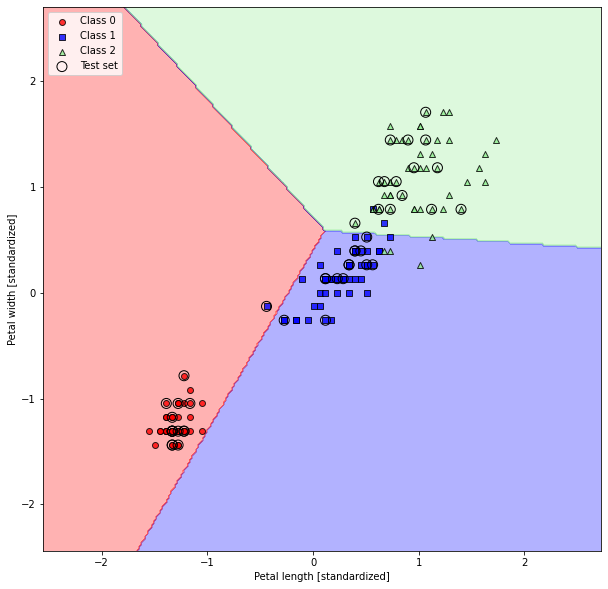

In [41]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, 
                      y=y_combined, 
                      classifier=ppn, 
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
# plt.tight_layout()
plt.show()

In [55]:
class LogisticRegressionGD:
    # Gradient descent based logistic regression
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta # learning rate
        self.n_iter = n_iter # number of iterations
        self.random_state = random_state # random seed for weight initialization
        
    def fit(self, X, y):
        # X = [n_samples, n_features]
        # y = [n_samples]
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) # initialize weights
        self.b_ = float(0.0)
        self.losses_ = []
        
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output) # derivative of log-likelihood loss function
            self.w_ += self.eta * X.T.dot(errors) / X.shape # update weights
            self.b_ += self.eta * errors.mean() # update bias 
            loss = ((-y * np.log(output) - (1 - y) * np.log(1 - output))) / X.shape[0] # log-likelihood loss function
            self.losses_.append(loss)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, z):
        return 1.0 / (1.0 + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

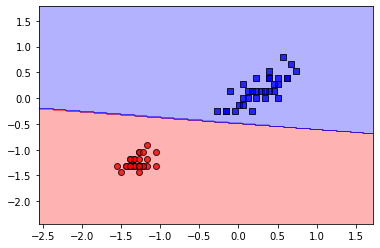

In [56]:
# Only consider Setosa and Versicolor
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,y=y_train_01_subset,classifier=lrgd)
plt.show()


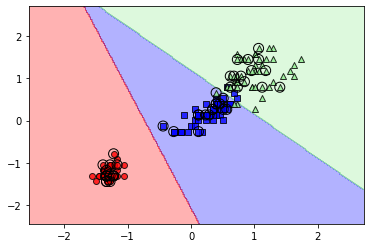

In [57]:
# Use sklearn's implementation of logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))

In [58]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [70]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1) # sum of probabilities for each sample is 1
print(X_test_std[:3, :].shape)
print(X_test_std[0, :].shape, X_test_std[0, :].reshape(1, -1).shape)

lr.predict_proba(X_test_std[0, :].reshape(1, -1)).shape

(3, 2)
(2,) (1, 2)


(1, 3)